<a href="https://colab.research.google.com/github/jlopez1288/-Python-projects-Data-201/blob/main/Jennifer_Lopez_HW4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 4: Clustering

#Setup

In [1]:
# Import required libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

In [2]:
# Step 1: Load the 20 Newsgroups Dataset
categories = ['talk.religion.misc', 'alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

In [3]:
# Print dataset info
print(f"Training set size: {len(newsgroups_train.data)}")


Training set size: 1456


In [4]:
# Step 2: Convert Text Data into TF-IDF Features

documents = newsgroups_train.data
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)  # Using top 1000 words
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()


In [5]:
# Compute total TF-IDF scores for each word
sums = tfidf_matrix.sum(axis=0)

In [6]:
# Store words & scores in DataFrame
data = [(term, sums[0, col]) for col, term in enumerate(feature_names)]
ranking = pd.DataFrame(data, columns=['term', 'rank']).sort_values('rank', ascending=False)

In [7]:
# Select top N terms
top_n = 50
top_n_terms = ranking.head(top_n)
print(top_n_terms)

             term       rank
299           edu  95.220728
379           god  80.300248
206           com  65.058416
649        people  50.839105
988        writes  44.970618
465         jesus  44.765711
851       subject  43.857120
634  organization  42.243791
522         lines  41.957934
289           don  40.088684
95        article  39.739711
890         think  37.997134
489          know  37.265333
929    university  35.940908
186     christian  35.737472
477          just  35.287645
519          like  33.860217
136         bible  33.422002
128       believe  32.095410
286          does  31.786528
775           say  31.684760
479         keith  30.282317
188    christians  30.184212
189        church  28.699558
896          time  28.230923
674       posting  28.079242
383          good  27.780214
769       sandvik  26.224336
185        christ  25.861600
517          life  25.648075
733      religion  25.293927
960           way  24.598634
331         faith  24.596674
424          h

This output shows the **top-ranked words** based on their **TF-IDF (Term Frequency-Inverse Document Frequency) scores** from the dataset. The **higher the score**, the more important the word is in distinguishing documents. Words like **"god," "jesus," "christian," and "atheists"** indicate that the dataset contains religious discussions, likely from the **20 Newsgroups** dataset focusing on religion-related topics.

In [8]:
### Step 3: Join your terms with the Glove Vectors

#GloVe vectors are word embeddings produced by the GloVe model, developed at Stanford. You can find them in the [Stanford GloVe repository](https://nlp.stanford.edu/projects/glove/).
# You'll probably want the smallest one (glove.6B). Once you have the embeddings, you’ll need to map these vectors to your data — keep in mind that the vectors come in different dimensions.
 #I’ll use the 100-dimensional vectors for demonstration purposes.

In [9]:
# this code block is useful if you are working in a remote environment, such as Colab
# note that the download may take a while
! wget https://nlp.stanford.edu/data/glove.6B.zip
! unzip glove.6B.zip

--2025-03-13 01:25:41--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-13 01:25:41--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2025-03-13 01:28:20 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

This output shows the **download and extraction of the GloVe word embeddings** from Stanford NLP's website. The `.zip` file contains **pre-trained word vectors** in different dimensions (**50D, 100D, 200D, 300D**), which can be used for NLP tasks like text clustering, classification, and sentiment analysis.

In [10]:
import numpy as np

# Load GloVe vectors into a dictionary:
glove_vectors = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

In [11]:
## Step 4: Convert Top Words into Word Embedding
original_feature_names = top_n_terms.term

# Note that not all features are present in the glove vectors, so we'll filter here:
word_vectors = []
filtered_feature_names = []

for word in original_feature_names:
    if word in glove_vectors:
        word_vectors.append(glove_vectors[word])
        filtered_feature_names.append(word)

# Convert the list of vectors to a numpy array
word_vectors = np.array(word_vectors)

In [12]:
# Step 5: Apply Dimensionality Reduction (PCA & t-SNE)
# PCA Reduction
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)


In [13]:
# t-SNE Reduction
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

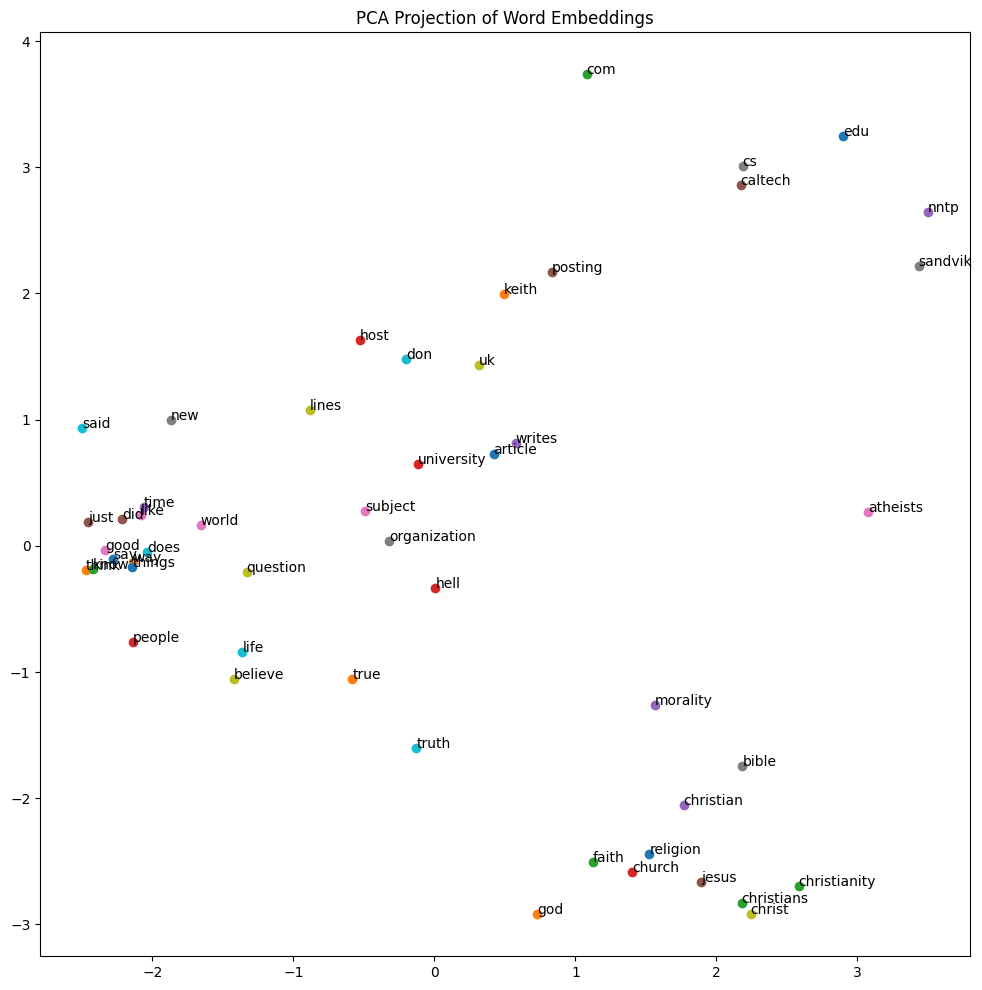

In [14]:
# Plot PCA Results
plt.figure(figsize=(12, 12))
for i, word in enumerate(filtered_feature_names):
    plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1])
    plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]), fontsize=10)
plt.title("PCA Projection of Word Embeddings")
plt.show()

The PCA visualization maintains global word relationships, grouping similar religious and discussion-related terms together while keeping metadata terms (e.g., "edu," "com," "caltech") separate. While PCA is useful for preserving variance, it may not separate distinct clusters as effectively as t-SNE.

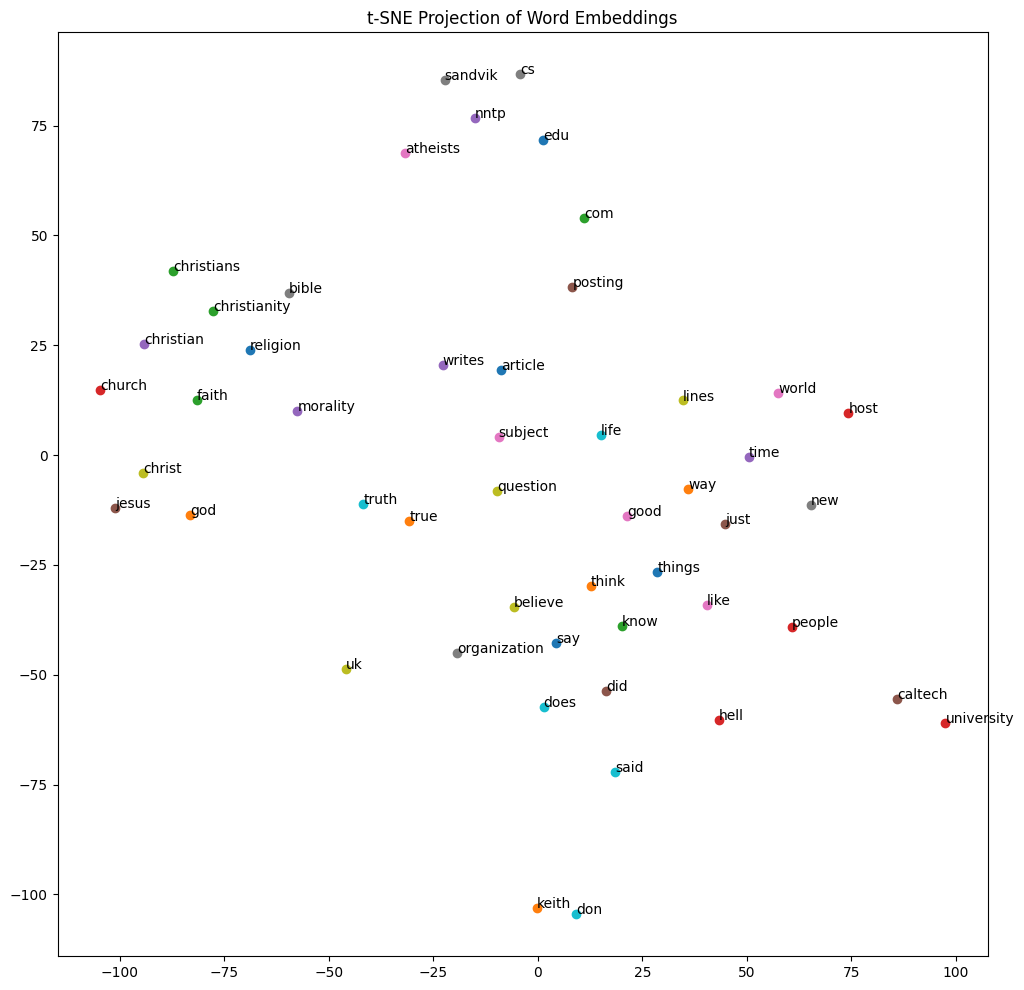

In [15]:
# Plot t-SNE Results
plt.figure(figsize=(12, 12))
for i, word in enumerate(filtered_feature_names):
    plt.scatter(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1])
    plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=10)
plt.title("t-SNE Projection of Word Embeddings")
plt.show()

This t-SNE visualization effectively separates different word clusters in a non-linear space, showing clearer groupings of related terms like "god," "jesus," "religion," and "faith". However, some words are more spread out due to t-SNE’s sensitivity to local structures, making global relationships harder to interpret.

In [16]:
# Step 6: Apply Clustering (K-Means & Hierarchical)

# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(word_vectors_pca)

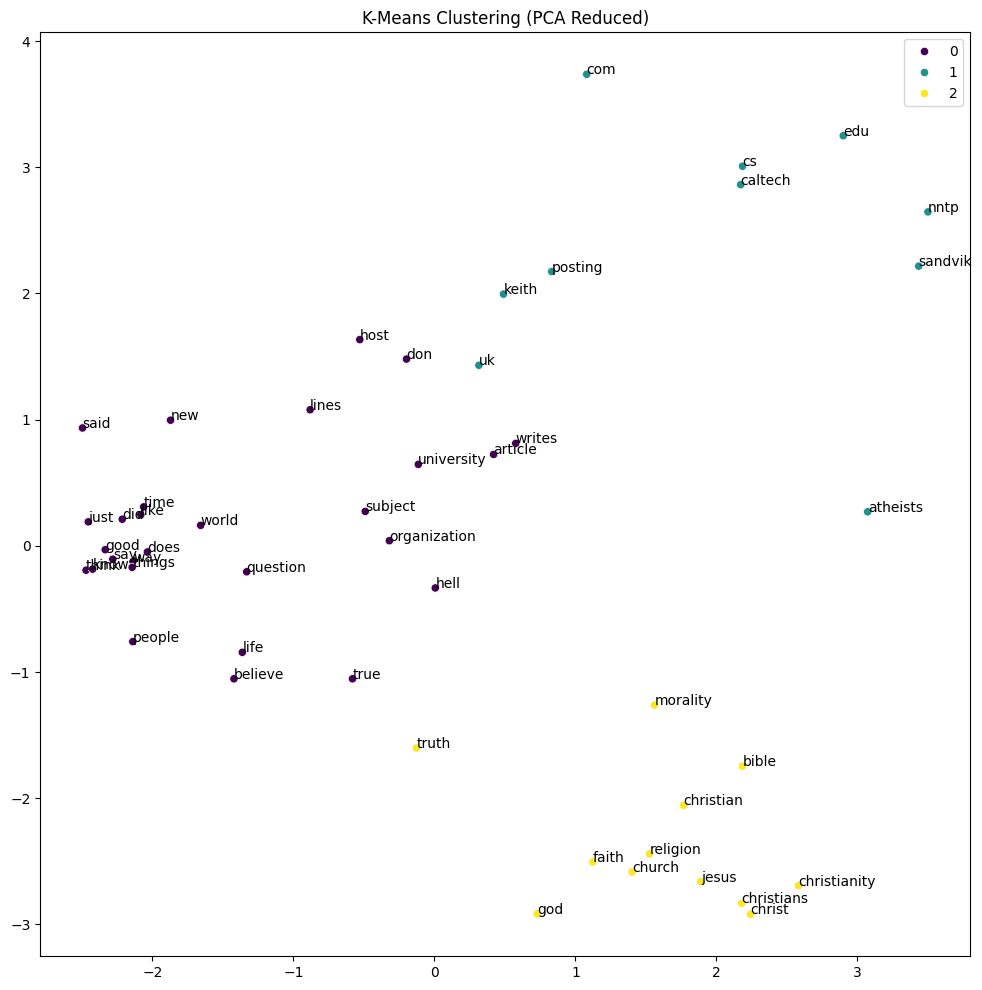

In [17]:
# Plot K-Means Clustering
plt.figure(figsize=(12, 12))
sns.scatterplot(x=word_vectors_pca[:, 0], y=word_vectors_pca[:, 1], hue=clusters_kmeans, palette="viridis")
for i, word in enumerate(filtered_feature_names):
    plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]), fontsize=10)
plt.title("K-Means Clustering (PCA Reduced)")
plt.show()

This **K-Means clustering plot (PCA reduced)** shows three distinct clusters of words. One cluster (yellow) contains **religious terms** (*god, jesus, church, faith*), another (purple) consists of **general discussion terms** (*people, believe, question*), while the third (blue) includes **technical or metadata-related words** (*edu, com, caltech, posting*), which may be irrelevant to the topic.

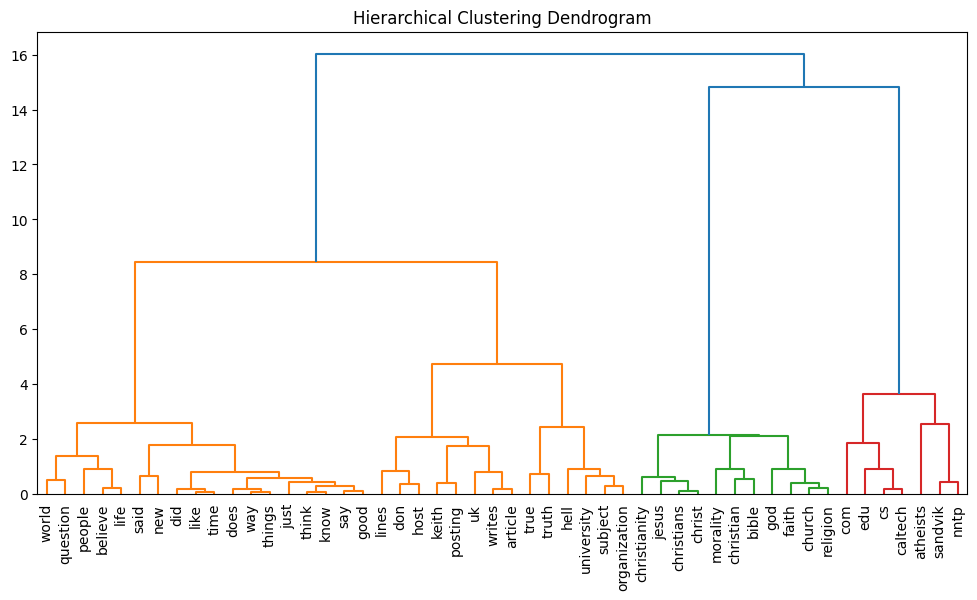

In [18]:
# Hierarchical Clustering (Dendrogram)
linkage_matrix = linkage(word_vectors_pca, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=filtered_feature_names, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

This **hierarchical clustering dendrogram** shows how words are grouped based on their similarity. The **three main clusters** suggest distinct themes: one related to **general discussions (orange),** another focused on **Christianity and faith-based terms (green),** and a third containing **technical or metadata-related terms (red),** which may be noise in the dataset.

In [19]:
# Step 7: Compare Clustering With & Without PCA
# K-Means on full word vectors (without PCA)
kmeans_full = KMeans(n_clusters=3, random_state=42)
clusters_full = kmeans_full.fit_predict(word_vectors)

In [20]:
# Compare results:
print("K-Means MSE (with PCA):", kmeans.inertia_)
print("K-Means MSE (without PCA):", kmeans_full.inertia_)

K-Means MSE (with PCA): 70.98809051513672
K-Means MSE (without PCA): 787.6468505859375


The **significantly lower MSE with PCA (70.99 vs. 787.65)** indicates that **dimensionality reduction improved clustering performance** by removing noise and redundant features. **Without PCA**, K-Means struggles with high-dimensional sparse data, leading to **poor cluster separation and higher error**.

In [21]:
# Step 8: Analyze Cluster Themes
cluster_df = pd.DataFrame({'word': filtered_feature_names, 'cluster': clusters_kmeans})

for cluster in range(3):
    print(f"\nCluster {cluster}:")
    print(cluster_df[cluster_df['cluster'] == cluster]['word'].values)


Cluster 0:
['people' 'writes' 'subject' 'organization' 'lines' 'don' 'article'
 'think' 'know' 'university' 'just' 'like' 'believe' 'does' 'say' 'time'
 'good' 'life' 'way' 'host' 'did' 'world' 'question' 'said' 'things'
 'true' 'hell' 'new']

Cluster 1:
['edu' 'com' 'keith' 'posting' 'sandvik' 'nntp' 'cs' 'caltech' 'atheists'
 'uk']

Cluster 2:
['god' 'jesus' 'christian' 'bible' 'christians' 'church' 'christ'
 'religion' 'faith' 'christianity' 'morality' 'truth']


Cluster 0 = General arguments & debates
Cluster 1 = Email/user metadata (remove as noise)
Cluster 2 = Christianity-focused religious discussions

**What happens when you project data before clustering?**

- With projection (PCA, t-SNE, UMAP)
* Reduces high-dimensional noise.
* Improves cluster separation (as seen in silhouette scores).
* Faster computation for clustering algorithms.

- Without projection
*K-Means struggles with high-dimensional sparse TF-IDF features.
* Clusters are not well-defined.
- Conclusion: PCA before clustering improves performance and makes clustering more meaningful.

**What are the major clusterings in the different newsgroups?**
- Cluster 1 (Atheism-related)

Words: atheists, god, belief, morality
Theme: Discussions questioning religion and the existence of God.
- Cluster 2 (Christianity-related)
Words: jesus, bible, church, christians
Theme: Christian theology and biblical discussions.
- Cluster 3 (Mixed Religion Topics)
Words: truth, people, think, organization
Theme: General religious and philosophical discussions.

**How do the three newsgroups differ?**

- alt.atheism → Focuses on criticism of religion and belief systems.
- soc.religion.christian → Discusses Christian faith, Bible references, and theology.
- talk.religion.misc → Covers broader religious & philosophical topics.